In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
df= pd.read_csv('general_car_data.csv')

C:\Users\Brian\AppData\Local\Temp\ipykernel_4820\3755871208.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('general_car_data.csv')


In [6]:
df.head()

,Unnamed: 0,Condition,Make,Body,Fuel,Second Condition,Registered Car,Model,Exchange Possible,Seats,...,region_name,count_images,count_views,id_y,description,boost,min_est,max_est,paid_infor,avg_est
0,0,Kenyan Used,Toyota,NaN,NaN,"['Original parts', 'Unpainted', 'No faults']",Yes,Crown,['No'],NaN,...,Kilimani,5.0,125.0,10593924.0,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1400000.0,1450000.0,Sponsored,1425000.0
1,1,Foreign Used,Mazda,NaN,NaN,['No faults'],NaN,CX-5,NaN,NaN,...,Kilimani,8.0,36.0,10717151.0,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2500000.0,2650000.0,Sponsored,2575000.0
2,2,Foreign Used,Mazda,NaN,NaN,['No faults'],Yes,Demio,NaN,NaN,...,Ridgeways,6.0,314.0,10417467.0,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1080000.0,1100000.0,Sponsored,1090000.0
3,3,Kenyan Used,Mazda,NaN,NaN,"['No faults', 'Original parts']",Yes,CX-5,NaN,NaN,...,Langata,9.0,87.0,10754171.0,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored,NaN
4,4,Foreign Used,Peugeot,NaN,NaN,['No faults'],No,508,['Yes'],NaN,...,Nairobi Central,17.0,2344.0,7115429.0,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored,NaN


In [7]:
# Creat a new column called Age:
df['Age']= df['Year of Manufacture'].apply(lambda x: (2022-int(x)) if pd.notna(x)  else x)

# Selecting the columns to use in training the model

In [8]:
selected_cols= ['Condition', 'Make','Age','Model','Transmission','Mileage', 'selling_price', 'Color','Registered Car','region_name',]

In [9]:
df_train = df[selected_cols]

In [10]:
# Check null
df_train.isnull().sum()

Condition          109
Make               109
Age                109
Model              109
Transmission        19
Mileage           5349
selling_price       18
Color               22
Registered Car    2482
region_name         18
dtype: int64

In [11]:
#Drop null
df_train.dropna(inplace=True)

C:\Users\Brian\AppData\Local\Temp\ipykernel_4820\1885435260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.dropna(inplace=True)


In [12]:
df_train.head()

,Condition,Make,Age,Model,Transmission,Mileage,selling_price,Color,Registered Car,region_name
2,Foreign Used,Mazda,7.0,Demio,Automatic,117000.0,1090000.0,Silver,Yes,Ridgeways
3,Kenyan Used,Mazda,9.0,CX-5,AMT,92929.0,1720000.0,Black,Yes,Langata
4,Foreign Used,Peugeot,8.0,508,Automatic,91000.0,1999000.0,Black,No,Nairobi Central
8,Kenyan Used,Honda,8.0,Fit,Automatic,117000.0,1050000.0,Silver,Yes,Nairobi Central
10,Foreign Used,Nissan,7.0,X-Trail,Automatic,87000.0,2500000.0,Black,Yes,Kilimani


In [13]:
df_train.corr()

,Age,Mileage,selling_price
Age,1.000000,0.349015,0.007662
Mileage,0.349015,1.000000,-0.002995
selling_price,0.007662,-0.002995,1.000000


## Select Car Model & Train for single Model

In [14]:
selected_model = 'Harrier'

In [15]:
# df['Model'].value_counts()
filt1= df_train['Model']==selected_model
df1=df_train.loc[filt1]

In [16]:
q = df1['selling_price'].quantile(.75)
filt2 = df1['selling_price'] <q
df1 = df1.loc[filt2]

In [17]:
# one hot encoding
df1 = pd.get_dummies(df1, columns=['Condition', 'Transmission'], drop_first=True)

In [18]:
# df1.columns
ls_drops=['Make', 'Model']

In [19]:
df1 = df1.drop(ls_drops, axis=1)

In [20]:
df1.columns

Index(['Age', 'Mileage', 'selling_price', 'Color', 'Registered Car',
       'region_name', 'Condition_Kenyan Used', 'Transmission_CVT'],
      dtype='object')

In [21]:
x= df1.drop('selling_price', axis=1)
y= df1.selling_price

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
x_train

,Age,Mileage,Color,Registered Car,region_name,Condition_Kenyan Used,Transmission_CVT
4244,8.0,41000.0,Silver,Yes,Ganjoni,0,0
16656,12.0,85000.0,Black,Yes,Langata,1,0
694,13.0,99663.0,Black,Yes,Muthaiga,1,0
13461,8.0,58066.0,Off white,No,Mombasa CBD,0,0
5278,7.0,87408.0,Purple,Yes,Mvita,0,0
...,...,...,...,...,...,...,...
8503,7.0,52000.0,Purple,Yes,Mvita,0,0
4025,12.0,112078.0,White,Yes,Ridgeways,1,0
5298,8.0,122400.0,Silver,Yes,Mombasa CBD,0,0
12730,8.0,98000.0,Black,No,Parklands/Highridge,0,0


In [24]:
# normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

ValueError: could not convert string to float: 'Silver'

In [ ]:
model=LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print('MAE', (mean_absolute_error(pred,y_test)))
print('MSE', (mean_squared_error(pred,y_test)))
print('R2', (metrics.r2_score(pred,y_test)))

In [ ]:
sns.regplot(x=pred, y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Model')
plt.show()

In [ ]:
model.score(x_test, y_test)

### Decision tree regressor 

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

In [ ]:
predictions = regressor.predict(x_test)

In [ ]:
# predictions

In [ ]:
regressor.score(x_test, y_test)

In [ ]:
print('MAE', (mean_absolute_error(predictions,y_test)))
print('MSE', (mean_squared_error(predictions,y_test)))
print('R2', (metrics.r2_score(predictions,y_test)))

In [ ]:
sns.regplot(x=predictions, y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Decision Tree regressor')
plt.show()

### Random forest regressor

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor  
 # create regressor object
r_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)  
# fit the regressor with x and y data
r_regressor.fit(x_train, y_train) 

In [ ]:
r_predictions = r_regressor.predict(x_test)

In [ ]:
print('MAE', (mean_absolute_error(r_predictions,y_test)))
print('MSE', (mean_squared_error(r_predictions,y_test)))
print('R2', (metrics.r2_score(r_predictions,y_test)))

In [ ]:
sns.regplot(x=r_predictions, y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest regressor')
plt.show()

## Predict car prices with linear regression

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df_train.columns

In [25]:
df_train.groupby(['Model'])['selling_price'].mean()

Model
1.8      1.097500e+06
100      9.400000e+05
116i     2.133298e+06
120i     3.575000e+06
1400     5.200000e+06
             ...     
XF       1.543333e+06
XV       1.971695e+06
Xenon    3.000000e+06
bB       1.995000e+06
iQ       9.195000e+05
Name: selling_price, Length: 329, dtype: float64

In [26]:
Mean_encoded_model = df_train.groupby(['Model'])['selling_price'].mean().to_dict()

In [27]:
df_train['Model_en'] =  df_train['Model'].map(Mean_encoded_model)

C:\Users\Brian\AppData\Local\Temp\ipykernel_4820\1843895128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Model_en'] =  df_train['Model'].map(Mean_encoded_model)


In [28]:
Mean_encoded_make = df_train.groupby(['Make'])['selling_price'].mean().to_dict()
df_train['Make_en'] =  df_train['Make'].map(Mean_encoded_make)

C:\Users\Brian\AppData\Local\Temp\ipykernel_4820\3327053382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Make_en'] =  df_train['Make'].map(Mean_encoded_make)


In [29]:
Mean_encoded_cond = df_train.groupby(['Condition'])['selling_price'].mean().to_dict()
df_train['Cond_en'] =  df_train['Condition'].map(Mean_encoded_cond)

C:\Users\Brian\AppData\Local\Temp\ipykernel_4820\672006822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cond_en'] =  df_train['Condition'].map(Mean_encoded_cond)


In [30]:
Mean_encoded_trans = df_train.groupby(['Transmission'])['selling_price'].mean().to_dict()
df_train['trans_en'] =  df_train['Transmission'].map(Mean_encoded_trans)

C:\Users\Brian\AppData\Local\Temp\ipykernel_4820\1896825002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['trans_en'] =  df_train['Transmission'].map(Mean_encoded_trans)


In [31]:
df_train.corr()

,Age,Mileage,selling_price,Model_en,Make_en,Cond_en,trans_en
Age,1.000000,0.349015,0.007662,0.031835,0.027374,0.289589,0.150819
Mileage,0.349015,1.000000,-0.002995,0.014805,0.006066,0.173981,0.111453
selling_price,0.007662,-0.002995,1.000000,0.202446,0.077170,0.008243,0.025217
Model_en,0.031835,0.014805,0.202446,1.000000,0.381187,0.011005,0.060200
Make_en,0.027374,0.006066,0.077170,0.381187,1.000000,0.028244,0.009611
Cond_en,0.289589,0.173981,0.008243,0.011005,0.028244,1.000000,0.081279
trans_en,0.150819,0.111453,0.025217,0.060200,0.009611,0.081279,1.000000


In [32]:
# df_train.columns
cols = ['Age','Mileage','selling_price', 'Model_en', 'Make_en', 'Cond_en', 'trans_en']

In [33]:
df2 = df_train[cols]

In [34]:
q = df2['selling_price'].quantile(.95)
filt2 = df2['selling_price'] <q
df2 = df2.loc[filt2]

In [35]:
df2.columns

Index(['Age', 'Mileage', 'selling_price', 'Model_en', 'Make_en', 'Cond_en',
       'trans_en'],
      dtype='object')

In [36]:
# df2 = df2.drop(['min_est', 'max_est'], axis = 1)

In [37]:
# one hot encoding
# df2 = pd.get_dummies(df2, columns=['Condition', 'Make','Model','Transmission'], drop_first=True)

In [38]:
df2.columns

Index(['Age', 'Mileage', 'selling_price', 'Model_en', 'Make_en', 'Cond_en',
       'trans_en'],
      dtype='object')

In [39]:
# Check the correlation
# plt.figure(figsize=(10,7))
# sns.heatmap(df.corr(), annot=True)
# plt.title('Correlation between variables')
# plt.show()

In [40]:
x= df2.drop('selling_price', axis=1)
y= df2['selling_price']

In [41]:
df2.selling_price.max()

6199999.0

In [42]:
print(x.shape, y.shape)

(10623, 6) (10623,)


In [43]:
# Separate the training and the test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [44]:
print(x_train.shape, x_test.shape)

(7436, 6) (3187, 6)


In [45]:
#normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
model=LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [47]:
# model.fit(x_train, y_train)

In [48]:
# pred = model.predict(x_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
print('MAE', (mean_absolute_error(pred,y_test)))
print('MSE', (mean_squared_error(pred,y_test)))
print('R2', (metrics.r2_score(pred,y_test)))

MAE 868071.6145677004
MSE 1261548358679.739
R2 -58.43239511465085


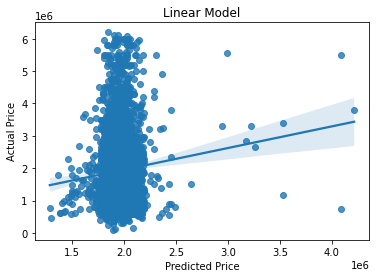

In [51]:
sns.regplot(x=pred, y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Model')
plt.show()

In [52]:
model.score(x_test, y_test)

0.0050086610082172855

### Random forest regressor

In [53]:
print(x_train.shape, y_train.shape)

(7436, 6) (7436,)


In [54]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
r_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
r_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [55]:
r_predictions = r_regressor.predict(x_test)

In [56]:
print('MAE', (mean_absolute_error(r_predictions,y_test)))
print('MSE', (mean_squared_error(r_predictions,y_test)))
print('R2', (metrics.r2_score(r_predictions,y_test)))

MAE 966389.8929628193
MSE 1627421402155.9373
R2 -3.0360531061834886


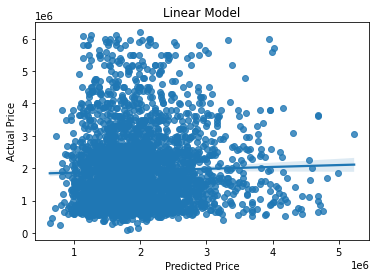

In [57]:
sns.regplot(x=r_predictions, y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Model')
plt.show()

In [58]:
df_3 = pd.DataFrame({'pred':r_predictions,'test':y_test})

In [59]:
df_3

,pred,test
875,1.658658e+06,2500000.0
4397,1.585166e+06,4295000.0
2941,2.916889e+06,970000.0
1506,1.261933e+06,4500000.0
5423,1.501765e+06,4000000.0
...,...,...
10378,2.781097e+06,1100000.0
3208,1.834650e+06,2700000.0
10882,1.638868e+06,1900000.0
561,2.525071e+06,5499999.0


In [60]:
df_3.isnull().sum()

pred    0
test    0
dtype: int64